In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,0,0,1])
lr=0.001
epoches=100

In [91]:
def stepfn(x):
    return np.where(x >= 0, 1, 0)

In [92]:
def perceptron(X, Y, lr, epoches):
    rs,cf=x.shape
    history=[]
    w=np.random.randn(1,cf)
    b=np.random.randn()
    
    for i in range(epoches+1):
        total_error=0
        for input,target in zip (X,Y):
            v=np.dot(w,input)+b
            pred=stepfn(v)
            error=abs(pred-target)
            b+=lr*error
            w+=lr*error*input
            total_error+=abs(error)
            history.append([{'epoch':i,'target':target,'pred':pred,'err':error,"bias":b.copy(),'weight':w.copy(),'total_error':total_error}])
    return b,w,history

In [93]:
def prediction(x, w, b):
    v=np.dot(w,x)+b
    return stepfn(v)

In [94]:
b,w,history=perceptron(x, y, lr, epoches)

In [95]:
print("Bias:", b)
print("Weights:", w)

Bias: [-1.25348008]
Weights: [[1.24675086 1.07411587]]


In [101]:
x=np.array([1,1])
prediction(x, w, b)

array([1])

In [97]:
history

[[{'epoch': 0,
   'target': np.int64(0),
   'pred': array([0]),
   'err': array([0]),
   'bias': array([-1.25348008]),
   'weight': array([[1.24675086, 1.07411587]]),
   'total_error': array([0])}],
 [{'epoch': 0,
   'target': np.int64(0),
   'pred': array([0]),
   'err': array([0]),
   'bias': array([-1.25348008]),
   'weight': array([[1.24675086, 1.07411587]]),
   'total_error': array([0])}],
 [{'epoch': 0,
   'target': np.int64(0),
   'pred': array([0]),
   'err': array([0]),
   'bias': array([-1.25348008]),
   'weight': array([[1.24675086, 1.07411587]]),
   'total_error': array([0])}],
 [{'epoch': 0,
   'target': np.int64(1),
   'pred': array([1]),
   'err': array([0]),
   'bias': array([-1.25348008]),
   'weight': array([[1.24675086, 1.07411587]]),
   'total_error': array([0])}],
 [{'epoch': 1,
   'target': np.int64(0),
   'pred': array([0]),
   'err': array([0]),
   'bias': array([-1.25348008]),
   'weight': array([[1.24675086, 1.07411587]]),
   'total_error': array([0])}],
 [{'e

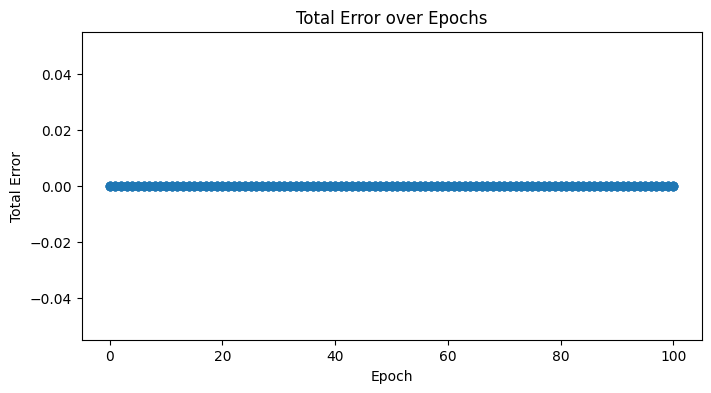

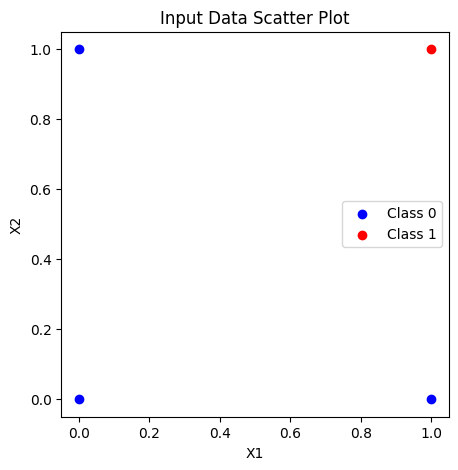

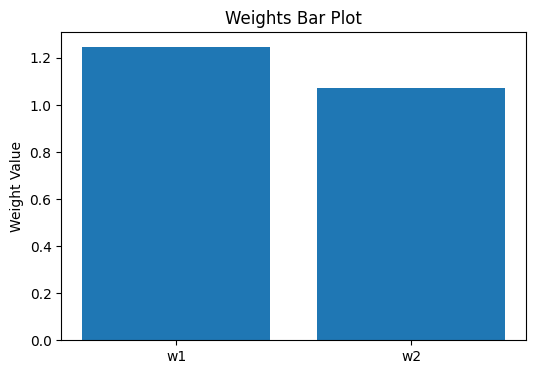

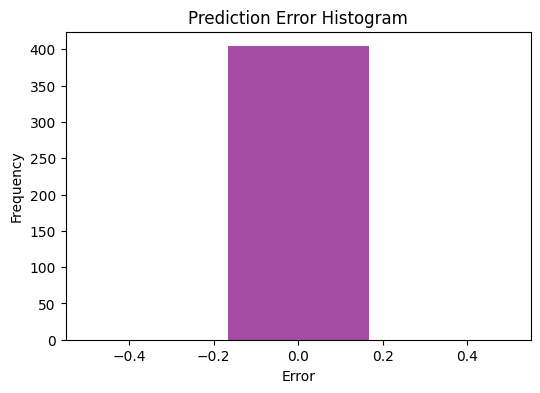

In [98]:
# Line plot of total error over epochs
total_errors = [h[0]['total_error'] for h in history]
epochs = [h[0]['epoch'] for h in history]
plt.figure(figsize=(8,4))
plt.plot(epochs, total_errors, marker='o')
plt.title('Total Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.show()

# Scatter plot of input data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])
plt.figure(figsize=(5,5))
for i, label in enumerate(Y):
    plt.scatter(X[i,0], X[i,1], c='red' if label else 'blue', label=f"Class {label}" if i==0 or i==3 else "")
plt.title('Input Data Scatter Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Bar plot of weights
plt.figure(figsize=(6,4))
plt.bar(['w1', 'w2'], w.flatten())
plt.title('Weights Bar Plot')
plt.ylabel('Weight Value')
plt.show()

# Histogram of prediction errors
errors = [h[0]['err'][0] if isinstance(h[0]['err'], np.ndarray) else h[0]['err'] for h in history]
plt.figure(figsize=(6,4))
plt.hist(errors, bins=3, color='purple', alpha=0.7)
plt.title('Prediction Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

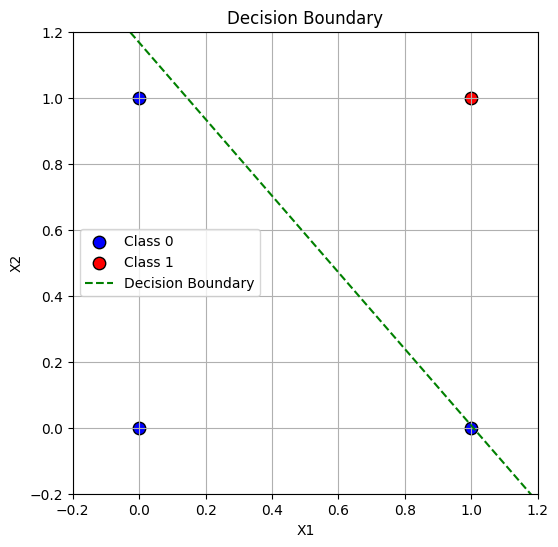

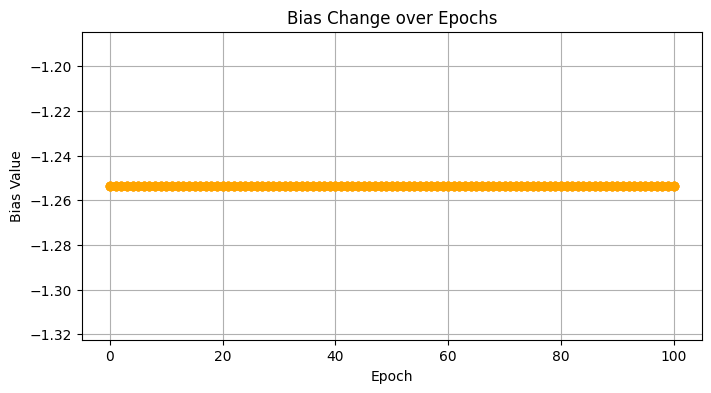

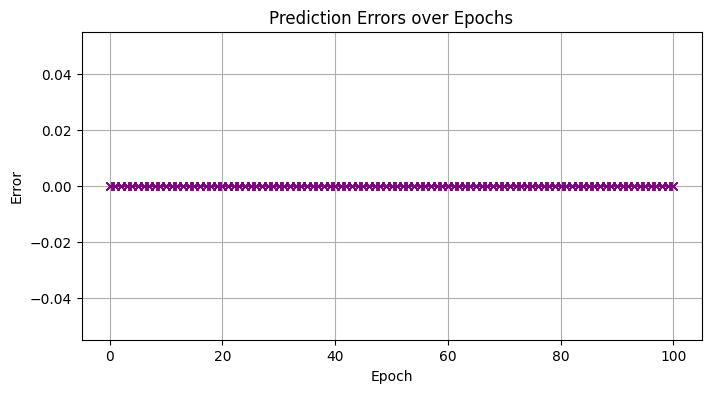

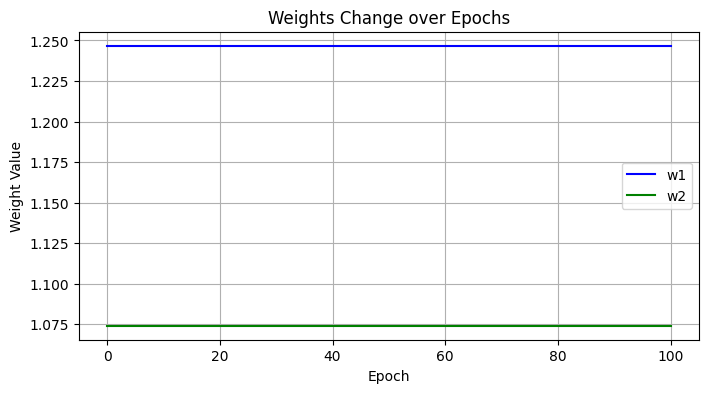

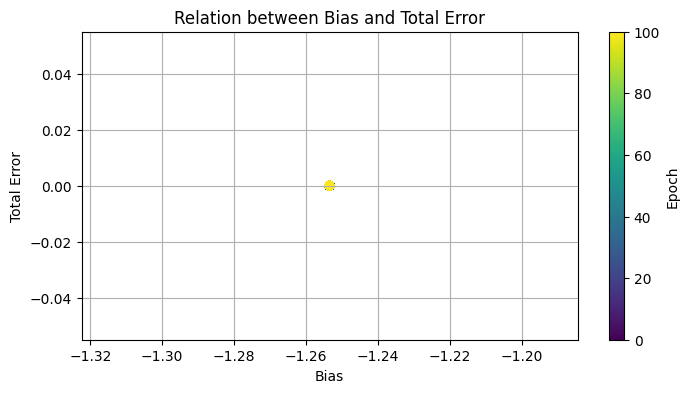

In [99]:
# Decision boundary plot
plt.figure(figsize=(6,6))
for idx, label in enumerate(Y):
    plt.scatter(X[idx,0], X[idx,1], c='red' if label else 'blue', s=80, edgecolor='k', label=f"Class {label}" if idx==0 or idx==3 else "")
    
# Decision boundary line: w1*x1 + w2*x2 + b = 0
x1_vals = np.linspace(-0.2, 1.2, 100)
x2_vals = -(w[0,0]*x1_vals + b[0])/w[0,1]
plt.plot(x1_vals, x2_vals, 'g--', label='Decision Boundary')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Bias change graph over epochs
biases = [h[0]['bias'] if isinstance(h[0]['bias'], np.ndarray) else np.array([h[0]['bias']]) for h in history]
biases = np.array(biases).flatten()
plt.figure(figsize=(8,4))
plt.plot(epochs, biases, marker='o', color='orange')
plt.title('Bias Change over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Bias Value')
plt.grid(True)
plt.show()

# Errors over epochs
plt.figure(figsize=(8,4))
plt.plot(epochs, errors, marker='x', color='purple')
plt.title('Prediction Errors over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Weights change over epochs
weights = np.array([h[0]['weight'].flatten() for h in history])
plt.figure(figsize=(8,4))
plt.plot(epochs, weights[:,0], label='w1', color='blue')
plt.plot(epochs, weights[:,1], label='w2', color='green')
plt.title('Weights Change over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)
plt.show()

# Relation between bias and total error
total_errors_flat = np.array([te[0] if isinstance(te, np.ndarray) else te for te in total_errors])
plt.figure(figsize=(8,4))
plt.scatter(biases, total_errors_flat, c=epochs, cmap='viridis')
plt.title('Relation between Bias and Total Error')
plt.xlabel('Bias')
plt.ylabel('Total Error')
plt.colorbar(label='Epoch')
plt.grid(True)
plt.show()